In [ ]:
#!jupyter nbconvert --to script A0Task2.ipynb 
# converts Jupyter notebook to python script 
# uncomment first line and run the cell to do so

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# get data as variables
X_train = pd.read_csv('Data/train_in.csv', header=None).values
y_train = pd.read_csv('Data/train_out.csv', header=None).values.flatten()
X_test = pd.read_csv('Data/test_in.csv', header=None).values
y_test = pd.read_csv('Data/test_out.csv', header=None).values.flatten()
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1707, 256) (1707,)
Test shape: (1000, 256) (1000,)


In [ ]:
# add bias
X_train_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print("Train with bias shape:", X_train_bias.shape)
print("Test with bias shape:", X_test_bias.shape)

Train with bias shape: (1707, 257)
Test with bias shape: (1000, 257)


In [13]:
num_features = X_train_bias.shape[1]
num_classes = 10

In [ ]:
# Helper functions
def predict(X, W):
    scores = X @ W
    return np.argmax(scores, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [132]:
# weight initialisation funtions

def normal_initilisation(num_features, num_classes, lr):
    return np.random.randn(num_features, num_classes) * lr

def xavier_initilisation(num_features, num_classes, lr):
    return np.random.randn(num_features, num_classes) * np.sqrt(2 / (num_features + num_classes))

In [133]:
# training functions

def run_training(w_init):
    final_train_acc = []
    final_test_acc = []

    seed_list = [123, 234, 345, 456, 567]
    learning_rates = [0.001, 0.01, 0.1, 0.5, 0.7, 1]

    epochs = 60
    final_train_acc = []
    final_test_acc = []

    for i in range(len(seed_list)):
        seed_train_acc = []
        seed_test_acc = []
        np.random.seed(seed_list[i])
        for lr in learning_rates:
            lr_train_acc = []
            lr_test_acc = []
            W = w_init(num_features, num_classes, lr)
            for epoch in range(epochs):
                for i in range(X_train_bias.shape[0]):
                    xi = X_train_bias[i]
                    yi = y_train[i]
                    scores = xi @ W
                    pred = np.argmax(scores)
                    if pred != yi:
                        W[:, yi] += lr * xi
                        W[:, pred] -= lr * xi
                
                train_pred = predict(X_train_bias, W)
                test_pred = predict(X_test_bias, W)
                lr_train_acc.append(accuracy(y_train, train_pred))
                lr_test_acc.append(accuracy(y_test, test_pred))

            seed_train_acc.append(lr_train_acc)
            seed_test_acc.append(lr_test_acc)

        final_train_acc.append(seed_train_acc)
        final_test_acc.append(seed_test_acc)

    return final_train_acc, final_test_acc

In [140]:
def plot_accuracy_over_epochs(final_mean_list, final_dev_list, name, learning_rates):
    plt.figure(figsize=(7,5))

    for pos, mean_acc in enumerate(final_mean_list):
        dev = final_dev_list[pos]
        epoch_count = np.arange(1, epochs + 1)

        plt.plot(epoch_count, mean_acc, label=f"lr={learning_rates[pos]}")
        # comment out to remove deviation between seeds
        #plt.fill_between(epoch_count, mean_acc - dev, mean_acc + dev, alpha=0.2)

    plt.title(f'{name} Accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [142]:
# train with different w_init's

final_train_acc = []
final_test_acc = []

normal_final_train_acc, normal_final_test_acc = run_training(normal_initilisation)

xavier_final_train_acc, xavier_final_test_acc = run_training(xavier_initilisation)

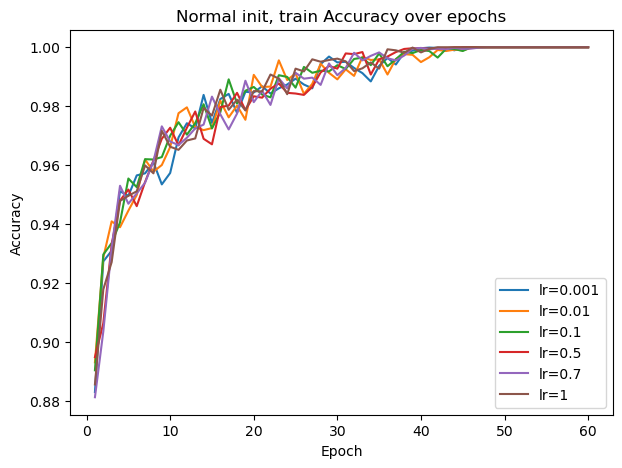

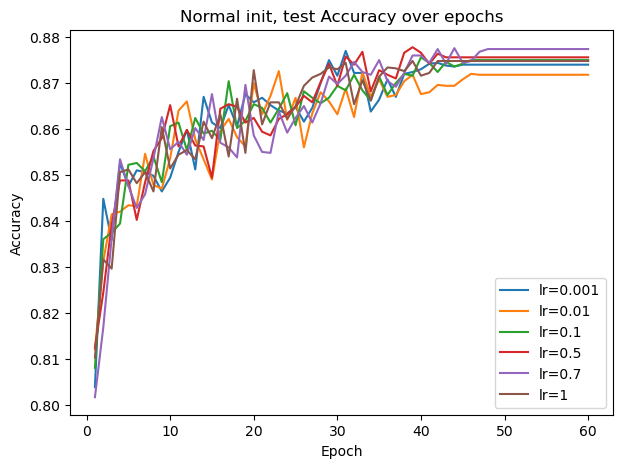

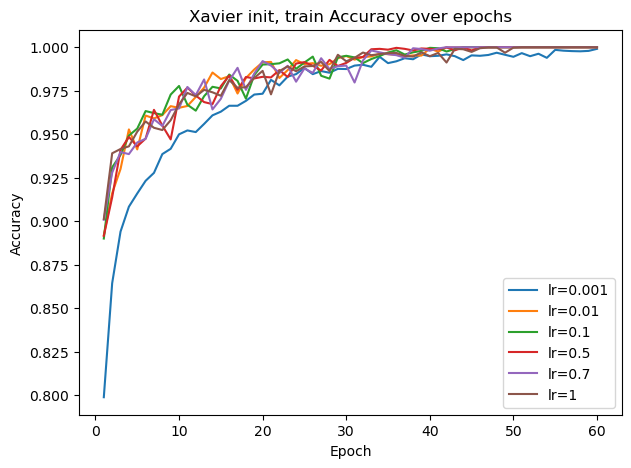

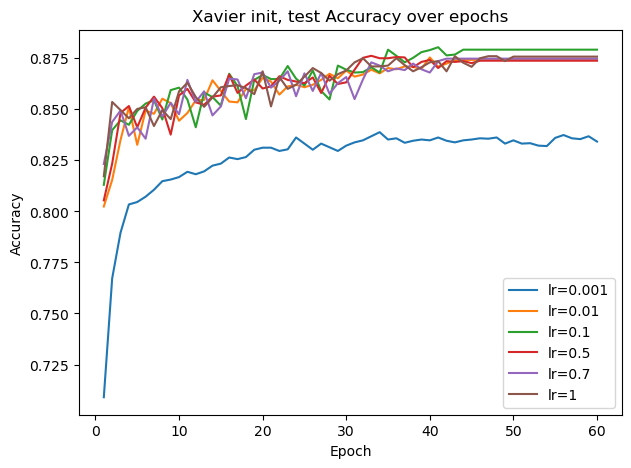

In [143]:
#plot train and test accuracy over epochs with normal initialisation
final_mean_dict = {}
final_dev_dict = {}

final_train_acc = np.array(normal_final_train_acc)
final_test_acc = np.array(normal_final_test_acc)

mean_train_acc = final_train_acc.mean(axis=0)
dev_train_acc = 1.96 * final_train_acc.std(axis=0) / np.sqrt(len(seed_list))

mean_test_acc = final_test_acc.mean(axis=0)
dev_test_ac = 1.96 * final_test_acc.std(axis=0) / np.sqrt(len(seed_list))


final_mean_dict['Train'] = mean_train_acc
final_dev_dict['Train'] = dev_train_acc
final_mean_dict['Test'] = mean_test_acc
final_dev_dict['Test'] = dev_test_ac

plot_accuracy_over_epochs(final_mean_dict['Train'], final_dev_dict['Train'], 'Normal init, train', learning_rates)
plot_accuracy_over_epochs(final_mean_dict['Test'], final_dev_dict['Test'], 'Normal init, test', learning_rates)


#plot train and test accuracy over epochs with xavier initialisation
final_mean_dict = {}
final_dev_dict = {}

final_train_acc = np.array(xavier_final_train_acc)
final_test_acc = np.array(xavier_final_test_acc)

mean_train_acc = final_train_acc.mean(axis=0)
dev_train_acc = 1.96 * final_train_acc.std(axis=0) / np.sqrt(len(seed_list))

mean_test_acc = final_test_acc.mean(axis=0)
dev_test_ac = 1.96 * final_test_acc.std(axis=0) / np.sqrt(len(seed_list))


final_mean_dict['Train'] = mean_train_acc
final_dev_dict['Train'] = dev_train_acc
final_mean_dict['Test'] = mean_test_acc
final_dev_dict['Test'] = dev_test_ac

plot_accuracy_over_epochs(final_mean_dict['Train'], final_dev_dict['Train'], 'Xavier init, train', learning_rates)
plot_accuracy_over_epochs(final_mean_dict['Test'], final_dev_dict['Test'], 'Xavier init, test', learning_rates)

